# Challenge


In this module, you learned the basics of deep learning and the fundamental architecture of artificial neural networks. During the examples in the checkpoints, you used a MNIST dataset. In this challenge, you'll work with another dataset: [fashion MNIST](https://github.com/zalandoresearch/fashion-mnist). Using this dataset, do the following:

1. Preprocess your data so that you can feed it into ANN models.
2. Split your data into training and test sets.
3. Try different ANN models and train them on your training set. You can play with the following:
  * 1. Number of layers
  * 2. Activation functions of the layers
  * 3. Number of neurons in the layers
  * 4. Different batch sizes during training
4. Compare your models' training scores and interpret your results.
5. Evaluate how your models perform on your test set. Compare the results of your models.



**Submit your solutions to the following tasks as a link to your Jupyter Notebook on GitHub. The grading team will get back to you with feedback shortly. Good luck!**



# Checkpoint
Submit your ideas or a link to your work here. This checkpoint will be reviewed by a member of the grading team. Once reviewed, you can find their notes here and in the feedback tab of your dashboard.

In [ ]:
import warnings 
warnings.filterwarnings("ignore")


import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow import keras

#for defining model and building ANN model:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense
from tensorflow.keras import datasets, layers, models
from tensorflow.keras import optimizers




#splitting dataset into train and test sets
#loading dataset
(x_train, y_train), (x_test, y_test)=datasets.fashion_mnist.load_data()

In [ ]:
y_train[:5] #1 dimensional 

array([9, 0, 0, 3, 0], dtype=uint8)

In [ ]:
y_train_shape=y_train.shape
print(f"shape of y_train: {y_train_shape}")


y_test_shape=y_test.shape
print(f"shape of y_test: {y_test_shape}")

x_train_shape=x_train.shape
print(f"\nshape of x_train: {x_train_shape}")

x_test_shape=x_test.shape
print(f"shape of x_test:  {x_test_shape}")

shape of y_train: (60000,)
shape of y_test: (10000,)

shape of x_train: (60000, 28, 28)
shape of x_test:  (10000, 28, 28)


* y_train and y_test are both one dimensional arrays. 
* x_train and x_test are both three dimensional arrays. 

Fashion-MNIST is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes. We intend Fashion-MNIST to serve as a direct drop-in replacement for the original MNIST dataset for benchmarking machine learning algorithms. It shares the same image size and structure of training and testing splits.

In [ ]:
input_dim=784 #28x28=784. 784 is the flattened version of the images. 
output_dim=nb_classes=10 #there are 10 classes total 

#There are 60,000 samples for the train set
x_train=x_train.reshape(60000, input_dim)
x_train=x_train.astype("float32")

#There are 10,000 samples for the test set
x_test=x_test.reshape(10000, input_dim)
x_test=x_test.astype("float32")

#normalizing each vector by dividing each element by 255
#255 is the maximum value of the RGB color scale
x_train /= 255
x_test /= 255

using one-hot encoding the target variable using `to_categorical()` function: 

In [ ]:
from tensorflow.keras.utils import to_categorical


y_train=to_categorical(y_train, nb_classes)
y_test=to_categorical(y_test, nb_classes)

In [ ]:
#this is the size of each image; 784.
#784 is the product of the 28 by 28 pixels 
x_train[0].shape

(784,)

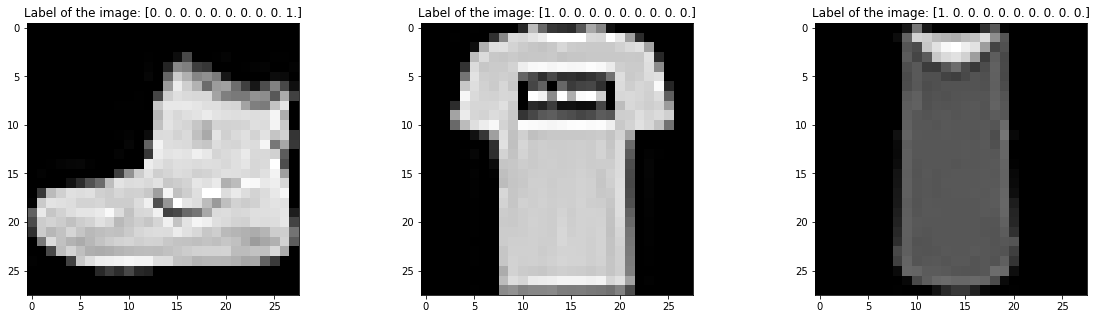

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,5))

plt.subplot(131)
plt.imshow(x_train[0].reshape(28,28), cmap="gray")
plt.title("Label of the image: {}".format(y_train[0]))

plt.subplot(132)
plt.imshow(x_train[1].reshape(28,28), cmap="gray")
plt.title("Label of the image: {}".format(y_train[1]))

plt.subplot(133)
plt.imshow(x_train[2].reshape(28,28), cmap="gray")
plt.title("Label of the image: {}".format(y_train[2]))

plt.show()

<h1><font color="red">3. Try different ANN models and train them on your training set. You can play with the following:</font color></h1>

  * 1. Number of layers
  * 2. Activation functions of the layers
  * 3. Number of neurons in the layers
  * 4. Different batch sizes during training

# Last Activation Function="Softmax"
# batch_size=1000
# 7 total layers 

In [ ]:
#defining first ann model
ann_model1=Sequential()


#first layer
ann_model1.add(Dense(1024, input_shape=(784, ), activation="relu"))

#second layer
ann_model1.add(Dense(512, activation="relu"))

#third layer
ann_model1.add(Dense(256, activation="relu"))

#fourth layer
ann_model1.add(Dense(128, activation="relu"))

#fifth layer
ann_model1.add(Dense(64, activation="relu"))

#sixth layer
ann_model1.add(Dense(32, activation="relu"))


#last layer; output layer.  
#using 10 because there are 10 labels total
ann_model1.add(Dense(10, activation="softmax"))

In [ ]:
#displaying structure of the ANN model using summary()
ann_model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1024)              803840    
_________________________________________________________________
dense_1 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_4 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_5 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_6 (Dense)              (None, 10)                3

In [ ]:
sm_accuracy=[]
sm_lr=[]

In [ ]:
#compiling the model
sgd_0001=optimizers.SGD(lr=0.0001) #lr=learning rate


ann_model1.compile(optimizer=sgd_0001, 
                   loss="categorical_crossentropy",
                   metrics=["accuracy"])

#training the model
ann_model1.fit(x_train, y_train, batch_size=1000, epochs=20, verbose=1)

Epoch 1/20
60/60 [==============================] - 9s 136ms/step - loss: 2.3004 - accuracy: 0.1139
Epoch 2/20
60/60 [==============================] - 8s 136ms/step - loss: 2.2963 - accuracy: 0.1250
Epoch 3/20
60/60 [==============================] - 8s 135ms/step - loss: 2.2915 - accuracy: 0.1387
Epoch 4/20
60/60 [==============================] - 8s 136ms/step - loss: 2.2870 - accuracy: 0.1516
Epoch 5/20
60/60 [==============================] - 8s 136ms/step - loss: 2.2829 - accuracy: 0.1641
Epoch 6/20
60/60 [==============================] - 8s 136ms/step - loss: 2.2785 - accuracy: 0.1755
Epoch 7/20
60/60 [==============================] - 8s 136ms/step - loss: 2.2760 - accuracy: 0.1840
Epoch 8/20
60/60 [==============================] - 8s 135ms/step - loss: 2.2717 - accuracy: 0.1917
Epoch 9/20
60/60 [==============================] - 8s 135ms/step - loss: 2.2685 - accuracy: 0.2021
Epoch 10/20
60/60 [==============================] - 8s 137ms/step - loss: 2.2653 - accuracy: 0.2117

In [ ]:
score=ann_model1.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy", score[1])

sm_lr_0001=score[1] #accuracy score

sm_accuracy.append(sm_lr_0001)
sm_lr.append("0.0001")

Test loss: 2.232750654220581
Test accuracy 0.2896000146865845


In [ ]:
sgd_01=optimizers.SGD(lr=0.01)


ann_model1.compile(optimizer=sgd_01, 
                   loss="categorical_crossentropy",
                   metrics=["accuracy"])

#training the model
ann_model1.fit(x_train, y_train, batch_size=1000, epochs=20, verbose=1)

Epoch 1/20
60/60 [==============================] - 9s 136ms/step - loss: 2.1490 - accuracy: 0.3972
Epoch 2/20
60/60 [==============================] - 8s 139ms/step - loss: 1.6741 - accuracy: 0.5686
Epoch 3/20
60/60 [==============================] - 8s 138ms/step - loss: 1.1636 - accuracy: 0.6360
Epoch 4/20
60/60 [==============================] - 8s 136ms/step - loss: 0.9155 - accuracy: 0.6706
Epoch 5/20
60/60 [==============================] - 8s 137ms/step - loss: 0.7981 - accuracy: 0.7068
Epoch 6/20
60/60 [==============================] - 8s 137ms/step - loss: 0.7504 - accuracy: 0.7201
Epoch 7/20
60/60 [==============================] - 8s 135ms/step - loss: 0.7114 - accuracy: 0.7317
Epoch 8/20
60/60 [==============================] - 8s 136ms/step - loss: 0.6821 - accuracy: 0.7467
Epoch 9/20
60/60 [==============================] - 8s 136ms/step - loss: 0.6361 - accuracy: 0.7764
Epoch 10/20
60/60 [==============================] - 8s 136ms/step - loss: 0.6290 - accuracy: 0.7758

In [ ]:
score=ann_model1.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy", score[1])


sm_lr_01=score[1] #accuracy score

sm_accuracy.append(sm_lr_01)
sm_lr.append("0.01")

Test loss: 0.5024769902229309
Test accuracy 0.8241999745368958


In [ ]:
sgd_1=optimizers.SGD(lr=1)

ann_model1.compile(optimizer=sgd_1, 
                   loss="categorical_crossentropy",
                   metrics=["accuracy"])

#training the model
ann_model1.fit(x_train, y_train, batch_size=1000, epochs=20, verbose=1)

Epoch 1/20
60/60 [==============================] - 9s 138ms/step - loss: nan - accuracy: 0.1568
Epoch 2/20
60/60 [==============================] - 8s 137ms/step - loss: nan - accuracy: 0.1001
Epoch 3/20
60/60 [==============================] - 8s 138ms/step - loss: nan - accuracy: 0.1000
Epoch 4/20
60/60 [==============================] - 8s 136ms/step - loss: nan - accuracy: 0.0986
Epoch 5/20
60/60 [==============================] - 8s 135ms/step - loss: nan - accuracy: 0.0998
Epoch 6/20
60/60 [==============================] - 8s 136ms/step - loss: nan - accuracy: 0.0997
Epoch 7/20
60/60 [==============================] - 8s 137ms/step - loss: nan - accuracy: 0.1004
Epoch 8/20
60/60 [==============================] - 8s 135ms/step - loss: nan - accuracy: 0.0987
Epoch 9/20
60/60 [==============================] - 8s 136ms/step - loss: nan - accuracy: 0.0996
Epoch 10/20
60/60 [==============================] - 8s 136ms/step - loss: nan - accuracy: 0.1017
Epoch 11/20
60/60 [==========

In [ ]:
score=ann_model1.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy", score[1])

sm_lr_1=score[1] #accuracy score

sm_accuracy.append(sm_lr_1)
sm_lr.append("1")

Test loss: nan
Test accuracy 0.10000000149011612


In [ ]:
#for eligibility, rounding silhouette scores to 3 decimal places
sm_accuracy_rounded = [round(x,3) for x in sm_accuracy] 
sm_accuracy_rounded

[0.29, 0.824, 0.1]

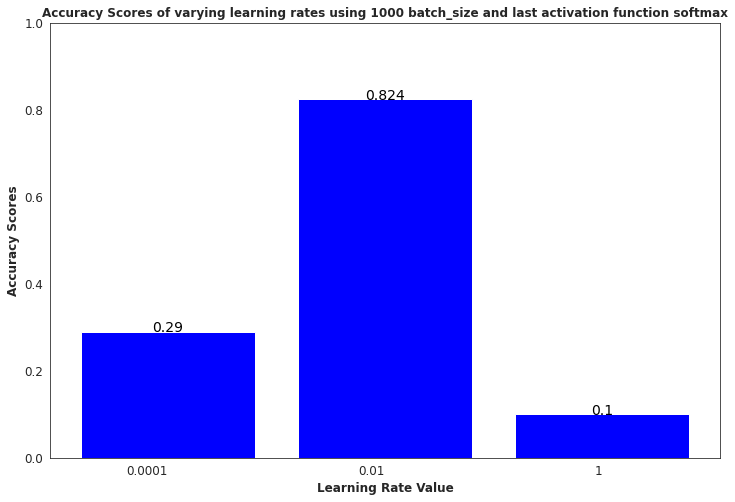

In [ ]:
#using bar graph to display the accuracy scores 


plt.figure(figsize=(12,8))
sns.set_style("white")

accuracy_scores=sm_accuracy_rounded

plt.bar(sm_lr,accuracy_scores, color='blue')

#labeling each bar with their cv score value. 
for i in range(len(accuracy_scores)):
    plt.annotate(str(accuracy_scores[i]), xy=(sm_lr[i],accuracy_scores[i]), ha='center', 
                 fontsize=14,fontweight='normal', color='black') #va='bottom')
    

    

plt.title("Accuracy Scores of varying learning rates using 1000 batch_size and last activation function softmax", fontsize=12,weight='heavy')
plt.xlabel('Learning Rate Value', fontsize=12, weight='heavy')
plt.ylabel('Accuracy Scores', fontsize=12, weight='heavy')

plt.xticks(rotation=0, horizontalalignment='right', 
           weight='normal', fontsize=12)
plt.yticks(weight='normal', fontsize=12)

plt.ylim(top=1) #setting y-axis limit value 


plt.show()

# Last Activation Function="Softmax"
# batch_size=500
# 7 total layers 

In [ ]:
#defining first ann model
ann_model=Sequential()


#first layer
ann_model.add(Dense(1024, input_shape=(784, ), activation="relu"))

#second layer
ann_model.add(Dense(512, activation="relu"))

#third layer
ann_model.add(Dense(256, activation="relu"))

#fourth layer
ann_model.add(Dense(128, activation="relu"))

#fifth layer
ann_model.add(Dense(64, activation="relu"))

#sixth layer
ann_model.add(Dense(32, activation="relu"))


#last layer; output layer.  
#using 10 because there are 10 labels total
ann_model.add(Dense(10, activation="softmax"))

In [ ]:
sm_accuracy2=[]
sm_lr2=[]

In [ ]:
#compiling the model
sgd_0001=optimizers.SGD(lr=0.0001) #lr=learning rate


ann_model.compile(optimizer=sgd_0001, 
                   loss="categorical_crossentropy",
                   metrics=["accuracy"])

#training the model
ann_model.fit(x_train, y_train, batch_size=500, epochs=20, verbose=1)

Epoch 1/20
120/120 [==============================] - 10s 75ms/step - loss: 2.3193 - accuracy: 0.0777
Epoch 2/20
120/120 [==============================] - 9s 74ms/step - loss: 2.3123 - accuracy: 0.0847
Epoch 3/20
120/120 [==============================] - 9s 73ms/step - loss: 2.3058 - accuracy: 0.0920
Epoch 4/20
120/120 [==============================] - 9s 73ms/step - loss: 2.3001 - accuracy: 0.0953
Epoch 5/20
120/120 [==============================] - 9s 74ms/step - loss: 2.2935 - accuracy: 0.0988
Epoch 6/20
120/120 [==============================] - 9s 74ms/step - loss: 2.2887 - accuracy: 0.1023
Epoch 7/20
120/120 [==============================] - 9s 73ms/step - loss: 2.2831 - accuracy: 0.1040
Epoch 8/20
120/120 [==============================] - 9s 74ms/step - loss: 2.2768 - accuracy: 0.1089
Epoch 9/20
120/120 [==============================] - 9s 74ms/step - loss: 2.2726 - accuracy: 0.1104
Epoch 10/20
120/120 [==============================] - 9s 73ms/step - loss: 2.2678 - accur

In [ ]:
score=ann_model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy", score[1])

sm_lr_0001=score[1] #accuracy score

sm_accuracy2.append(sm_lr_0001)
sm_lr2.append("0.0001")

Test loss: 2.2088584899902344
Test accuracy 0.2012999951839447


In [ ]:
#compiling the model
sgd_01=optimizers.SGD(lr=0.01) #lr=learning rate


ann_model.compile(optimizer=sgd_01, 
                   loss="categorical_crossentropy",
                   metrics=["accuracy"])

#training the model
ann_model.fit(x_train, y_train, batch_size=500, epochs=20, verbose=1)

Epoch 1/20
120/120 [==============================] - 9s 73ms/step - loss: 2.0276 - accuracy: 0.3460
Epoch 2/20
120/120 [==============================] - 9s 74ms/step - loss: 1.1628 - accuracy: 0.6454
Epoch 3/20
120/120 [==============================] - 9s 74ms/step - loss: 0.8052 - accuracy: 0.7222
Epoch 4/20
120/120 [==============================] - 9s 73ms/step - loss: 0.6986 - accuracy: 0.7635
Epoch 5/20
120/120 [==============================] - 9s 74ms/step - loss: 0.6405 - accuracy: 0.7842
Epoch 6/20
120/120 [==============================] - 9s 74ms/step - loss: 0.5771 - accuracy: 0.8048
Epoch 7/20
120/120 [==============================] - 9s 74ms/step - loss: 0.5475 - accuracy: 0.8107
Epoch 8/20
120/120 [==============================] - 9s 74ms/step - loss: 0.5308 - accuracy: 0.8152
Epoch 9/20
120/120 [==============================] - 9s 75ms/step - loss: 0.5025 - accuracy: 0.8276
Epoch 10/20
120/120 [==============================] - 9s 76ms/step - loss: 0.4850 - accura

In [ ]:
score=ann_model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy", score[1])


sm_lr_01=score[1] #accuracy score

sm_accuracy2.append(sm_lr_01)
sm_lr2.append("0.01")

Test loss: 0.4332515001296997
Test accuracy 0.8493000268936157


In [ ]:
#compiling the model
sgd_1=optimizers.SGD(lr=1) #lr=learning rate


ann_model.compile(optimizer=sgd_1, 
                   loss="categorical_crossentropy",
                   metrics=["accuracy"])

#training the model
ann_model.fit(x_train, y_train, batch_size=500, epochs=20, verbose=1)

Epoch 1/20
120/120 [==============================] - 9s 73ms/step - loss: nan - accuracy: 0.1330
Epoch 2/20
120/120 [==============================] - 9s 73ms/step - loss: nan - accuracy: 0.0982
Epoch 3/20
120/120 [==============================] - 9s 73ms/step - loss: nan - accuracy: 0.1009
Epoch 4/20
120/120 [==============================] - 9s 73ms/step - loss: nan - accuracy: 0.0984
Epoch 5/20
120/120 [==============================] - 9s 74ms/step - loss: nan - accuracy: 0.0991
Epoch 6/20
120/120 [==============================] - 9s 73ms/step - loss: nan - accuracy: 0.1006
Epoch 7/20
120/120 [==============================] - 9s 74ms/step - loss: nan - accuracy: 0.1022
Epoch 8/20
120/120 [==============================] - 9s 73ms/step - loss: nan - accuracy: 0.0993
Epoch 9/20
120/120 [==============================] - 9s 73ms/step - loss: nan - accuracy: 0.0995
Epoch 10/20
120/120 [==============================] - 9s 73ms/step - loss: nan - accuracy: 0.1021
Epoch 11/20
120/120

In [ ]:
score=ann_model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy", score[1])


sm_lr_1=score[1] #accuracy score

sm_accuracy2.append(sm_lr_1)
sm_lr2.append("1")

Test loss: nan
Test accuracy 0.10000000149011612


In [ ]:
#for eligibility, rounding silhouette scores to 3 decimal places
sm_accuracy_rounded = [round(x,3) for x in sm_accuracy2] 
sm_accuracy_rounded

[0.201, 0.849, 0.1]

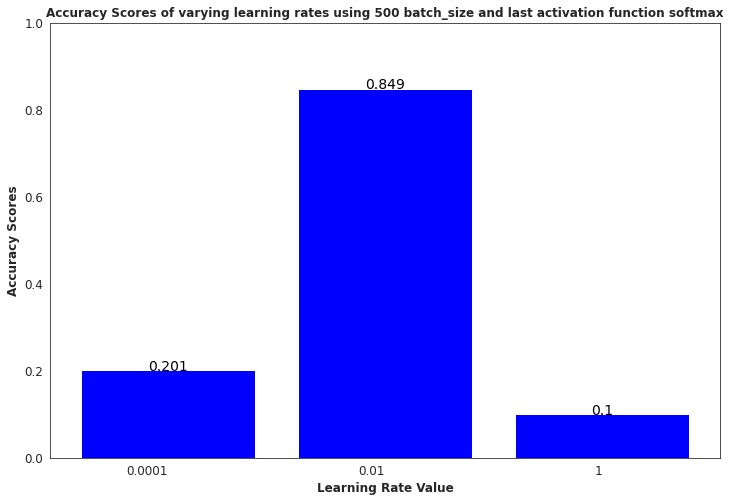

In [ ]:
#using bar graph to display the accuracy scores 


plt.figure(figsize=(12,8))
sns.set_style("white")

accuracy_scores=sm_accuracy_rounded

plt.bar(sm_lr2,accuracy_scores, color='blue')

#labeling each bar with their cv score value. 
for i in range(len(accuracy_scores)):
    plt.annotate(str(accuracy_scores[i]), xy=(sm_lr2[i],accuracy_scores[i]), ha='center', 
                 fontsize=14,fontweight='normal', color='black') #va='bottom')
    

    

plt.title("Accuracy Scores of varying learning rates using 500 batch_size and last activation function softmax", fontsize=12,weight='heavy')
plt.xlabel('Learning Rate Value', fontsize=12, weight='heavy')
plt.ylabel('Accuracy Scores', fontsize=12, weight='heavy')

plt.xticks(rotation=0, horizontalalignment='right', 
           weight='normal', fontsize=12)
plt.yticks(weight='normal', fontsize=12)

plt.ylim(top=1) #setting y-axis limit value 


plt.show()

# Last Activation Function="Softmax"
# batch_size=1000
# 4 total layers 

In [ ]:
sm_accuracy3=[]
sm_lr3=[]

In [ ]:
#defining ann model
ann_model=Sequential()


#first layer
ann_model.add(Dense(1024, input_shape=(784, ), activation="relu"))

#second layer
ann_model.add(Dense(512, activation="relu"))

#third layer
ann_model.add(Dense(64, activation="relu"))

#last layer; output layer.  
#using 10 because there are 10 labels total
ann_model.add(Dense(10, activation="softmax"))

In [ ]:
#compiling the model
sgd_0001=optimizers.SGD(lr=0.0001) #lr=learning rate


ann_model.compile(optimizer=sgd_0001, 
                   loss="categorical_crossentropy",
                   metrics=["accuracy"])

#training the model
ann_model.fit(x_train, y_train, batch_size=1000, epochs=20, verbose=1)

Epoch 1/20
60/60 [==============================] - 8s 120ms/step - loss: 2.3627 - accuracy: 0.1571
Epoch 2/20
60/60 [==============================] - 7s 120ms/step - loss: 2.3455 - accuracy: 0.1595
Epoch 3/20
60/60 [==============================] - 7s 121ms/step - loss: 2.3264 - accuracy: 0.1682
Epoch 4/20
60/60 [==============================] - 7s 120ms/step - loss: 2.3073 - accuracy: 0.1768
Epoch 5/20
60/60 [==============================] - 7s 120ms/step - loss: 2.2937 - accuracy: 0.1742
Epoch 6/20
60/60 [==============================] - 7s 120ms/step - loss: 2.2758 - accuracy: 0.1836
Epoch 7/20
60/60 [==============================] - 7s 119ms/step - loss: 2.2602 - accuracy: 0.1866
Epoch 8/20
60/60 [==============================] - 7s 120ms/step - loss: 2.2444 - accuracy: 0.1861
Epoch 9/20
60/60 [==============================] - 7s 120ms/step - loss: 2.2296 - accuracy: 0.1884
Epoch 10/20
60/60 [==============================] - 7s 119ms/step - loss: 2.2150 - accuracy: 0.1919

In [ ]:
score=ann_model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy", score[1])


sm_lr_0001=score[1] #accuracy score

sm_accuracy3.append(sm_lr_0001)
sm_lr3.append("0.0001")

Test loss: 2.093034505844116
Test accuracy 0.23909999430179596


In [ ]:
#compiling the model
sgd_01=optimizers.SGD(lr=0.01) #lr=learning rate


ann_model.compile(optimizer=sgd_01, 
                   loss="categorical_crossentropy",
                   metrics=["accuracy"])

#training the model
ann_model.fit(x_train, y_train, batch_size=1000, epochs=20, verbose=1)

Epoch 1/20
60/60 [==============================] - 8s 120ms/step - loss: 1.8711 - accuracy: 0.4527
Epoch 2/20
60/60 [==============================] - 7s 119ms/step - loss: 1.2393 - accuracy: 0.6636
Epoch 3/20
60/60 [==============================] - 7s 120ms/step - loss: 0.9579 - accuracy: 0.7155
Epoch 4/20
60/60 [==============================] - 7s 120ms/step - loss: 0.8195 - accuracy: 0.7511
Epoch 5/20
60/60 [==============================] - 7s 121ms/step - loss: 0.7448 - accuracy: 0.7668
Epoch 6/20
60/60 [==============================] - 7s 123ms/step - loss: 0.6884 - accuracy: 0.7794
Epoch 7/20
60/60 [==============================] - 7s 121ms/step - loss: 0.6543 - accuracy: 0.7890
Epoch 8/20
60/60 [==============================] - 7s 120ms/step - loss: 0.6219 - accuracy: 0.7981
Epoch 9/20
60/60 [==============================] - 7s 120ms/step - loss: 0.6018 - accuracy: 0.8035
Epoch 10/20
60/60 [==============================] - 7s 119ms/step - loss: 0.5822 - accuracy: 0.8089

In [ ]:
score=ann_model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy", score[1])

sm_lr_01=score[1] #accuracy score

sm_accuracy3.append(sm_lr_01)
sm_lr3.append("0.01")

Test loss: 0.5056796669960022
Test accuracy 0.824999988079071


In [ ]:
#compiling the model
sgd_1=optimizers.SGD(lr=1) #lr=learning rate


ann_model.compile(optimizer=sgd_1, 
                   loss="categorical_crossentropy",
                   metrics=["accuracy"])

#training the model
ann_model.fit(x_train, y_train, batch_size=1000, epochs=20, verbose=1)

Epoch 1/20
60/60 [==============================] - 7s 119ms/step - loss: nan - accuracy: 0.1680
Epoch 2/20
60/60 [==============================] - 7s 120ms/step - loss: nan - accuracy: 0.1007
Epoch 3/20
60/60 [==============================] - 7s 119ms/step - loss: nan - accuracy: 0.0998
Epoch 4/20
60/60 [==============================] - 7s 119ms/step - loss: nan - accuracy: 0.0989
Epoch 5/20
60/60 [==============================] - 7s 119ms/step - loss: nan - accuracy: 0.1009
Epoch 6/20
60/60 [==============================] - 7s 120ms/step - loss: nan - accuracy: 0.1016
Epoch 7/20
60/60 [==============================] - 7s 119ms/step - loss: nan - accuracy: 0.1022
Epoch 8/20
60/60 [==============================] - 7s 120ms/step - loss: nan - accuracy: 0.0990
Epoch 9/20
60/60 [==============================] - 7s 120ms/step - loss: nan - accuracy: 0.1008
Epoch 10/20
60/60 [==============================] - 7s 119ms/step - loss: nan - accuracy: 0.1014
Epoch 11/20
60/60 [==========

In [ ]:
score=ann_model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy", score[1])

sm_lr_1=score[1] #accuracy score

sm_accuracy3.append(sm_lr_1)
sm_lr3.append("0.1")

Test loss: nan
Test accuracy 0.10000000149011612


In [ ]:
#for eligibility, rounding silhouette scores to 3 decimal places
sm_accuracy_rounded = [round(x,3) for x in sm_accuracy3] 
sm_accuracy_rounded

[0.239, 0.825, 0.1]

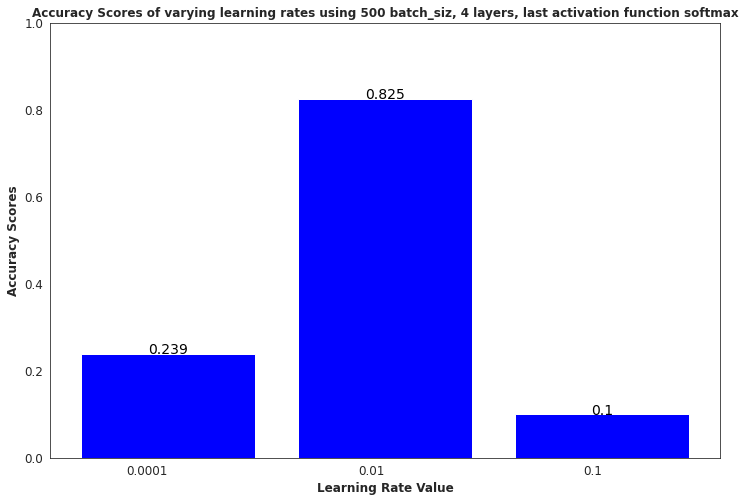

In [ ]:
#using bar graph to display the accuracy scores 


plt.figure(figsize=(12,8))
sns.set_style("white")

accuracy_scores=sm_accuracy_rounded

plt.bar(sm_lr3,accuracy_scores, color='blue')

#labeling each bar with their cv score value. 
for i in range(len(accuracy_scores)):
    plt.annotate(str(accuracy_scores[i]), xy=(sm_lr3[i],accuracy_scores[i]), ha='center', 
                 fontsize=14,fontweight='normal', color='black') #va='bottom')
    

    

plt.title("Accuracy Scores of varying learning rates using 1000 batch_size, 4 layers, last activation function softmax", fontsize=12,weight='heavy')
plt.xlabel('Learning Rate Value', fontsize=12, weight='heavy')
plt.ylabel('Accuracy Scores', fontsize=12, weight='heavy')

plt.xticks(rotation=0, horizontalalignment='right', 
           weight='normal', fontsize=12)
plt.yticks(weight='normal', fontsize=12)

plt.ylim(top=1) #setting y-axis limit value 


plt.show()

# Last Activation Function="Softmax"
# batch_size=500
# 4 total layers 

In [ ]:
sm_accuracy4=[]
sm_lr4=[]

In [ ]:
#defining first ann model
ann_model=Sequential()


#first layer
ann_model.add(Dense(1024, input_shape=(784, ), activation="relu"))

#second layer
ann_model.add(Dense(512, activation="relu"))

#third layer
ann_model.add(Dense(64, activation="relu"))

#last layer; output layer.  
#using 10 because there are 10 labels total
ann_model.add(Dense(10, activation="softmax"))

In [ ]:
#compiling the model
sgd_0001=optimizers.SGD(lr=0.0001) #lr=learning rate


ann_model.compile(optimizer=sgd_0001, 
                   loss="categorical_crossentropy",
                   metrics=["accuracy"])

#training the model
ann_model.fit(x_train, y_train, batch_size=500, epochs=20, verbose=1)

Epoch 1/20
120/120 [==============================] - 8s 65ms/step - loss: 2.3141 - accuracy: 0.1608
Epoch 2/20
120/120 [==============================] - 8s 65ms/step - loss: 2.2860 - accuracy: 0.1837
Epoch 3/20
120/120 [==============================] - 8s 65ms/step - loss: 2.2572 - accuracy: 0.2092
Epoch 4/20
120/120 [==============================] - 8s 65ms/step - loss: 2.2318 - accuracy: 0.2316
Epoch 5/20
120/120 [==============================] - 8s 67ms/step - loss: 2.2047 - accuracy: 0.2617
Epoch 6/20
120/120 [==============================] - 8s 65ms/step - loss: 2.1809 - accuracy: 0.2968
Epoch 7/20
120/120 [==============================] - 8s 65ms/step - loss: 2.1577 - accuracy: 0.3305
Epoch 8/20
120/120 [==============================] - 8s 65ms/step - loss: 2.1351 - accuracy: 0.3670
Epoch 9/20
120/120 [==============================] - 8s 65ms/step - loss: 2.1124 - accuracy: 0.3951
Epoch 10/20
120/120 [==============================] - 8s 65ms/step - loss: 2.0910 - accura

In [ ]:
score=ann_model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy", score[1])


sm_lr_0001=score[1] #accuracy score

sm_accuracy4.append(sm_lr_0001)
sm_lr4.append("0.0001")

Test loss: 1.8760634660720825
Test accuracy 0.5116999745368958


In [ ]:
#compiling the model
sgd_01=optimizers.SGD(lr=0.01) #lr=learning rate


ann_model.compile(optimizer=sgd_01, 
                   loss="categorical_crossentropy",
                   metrics=["accuracy"])

#training the model
ann_model.fit(x_train, y_train, batch_size=500, epochs=20, verbose=1)

Epoch 1/20
120/120 [==============================] - 8s 65ms/step - loss: 1.5270 - accuracy: 0.6110
Epoch 2/20
120/120 [==============================] - 8s 65ms/step - loss: 0.9137 - accuracy: 0.7129
Epoch 3/20
120/120 [==============================] - 8s 64ms/step - loss: 0.7437 - accuracy: 0.7690
Epoch 4/20
120/120 [==============================] - 8s 64ms/step - loss: 0.6557 - accuracy: 0.7952
Epoch 5/20
120/120 [==============================] - 8s 65ms/step - loss: 0.6079 - accuracy: 0.8050
Epoch 6/20
120/120 [==============================] - 8s 64ms/step - loss: 0.5652 - accuracy: 0.8172
Epoch 7/20
120/120 [==============================] - 8s 65ms/step - loss: 0.5397 - accuracy: 0.8212
Epoch 8/20
120/120 [==============================] - 8s 64ms/step - loss: 0.5195 - accuracy: 0.8267
Epoch 9/20
120/120 [==============================] - 8s 65ms/step - loss: 0.5060 - accuracy: 0.8295
Epoch 10/20
120/120 [==============================] - 8s 65ms/step - loss: 0.4942 - accura

In [ ]:
score=ann_model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy", score[1])

sm_lr_01=score[1] #accuracy score

sm_accuracy4.append(sm_lr_01)
sm_lr4.append("0.01")

Test loss: 0.45591410994529724
Test accuracy 0.8388000130653381


In [ ]:
#compiling the model
sgd_1=optimizers.SGD(lr=1) #lr=learning rate


ann_model.compile(optimizer=sgd_1, 
                   loss="categorical_crossentropy",
                   metrics=["accuracy"])

#training the model
ann_model.fit(x_train, y_train, batch_size=500, epochs=20, verbose=1)

Epoch 1/20
120/120 [==============================] - 8s 65ms/step - loss: nan - accuracy: 0.1367
Epoch 2/20
120/120 [==============================] - 8s 65ms/step - loss: nan - accuracy: 0.0989
Epoch 3/20
120/120 [==============================] - 8s 65ms/step - loss: nan - accuracy: 0.1014
Epoch 4/20
120/120 [==============================] - 8s 65ms/step - loss: nan - accuracy: 0.1003
Epoch 5/20
120/120 [==============================] - 8s 65ms/step - loss: nan - accuracy: 0.0992
Epoch 6/20
120/120 [==============================] - 8s 65ms/step - loss: nan - accuracy: 0.0994
Epoch 7/20
120/120 [==============================] - 8s 65ms/step - loss: nan - accuracy: 0.1006
Epoch 8/20
120/120 [==============================] - 8s 65ms/step - loss: nan - accuracy: 0.1013
Epoch 9/20
120/120 [==============================] - 8s 65ms/step - loss: nan - accuracy: 0.0979
Epoch 10/20
120/120 [==============================] - 8s 65ms/step - loss: nan - accuracy: 0.1000
Epoch 11/20
120/120

In [ ]:
score=ann_model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy", score[1])

sm_lr_1=score[1] #accuracy score

sm_accuracy4.append(sm_lr_1)
sm_lr4.append("1")

Test loss: nan
Test accuracy 0.10000000149011612


In [ ]:
#for eligibility, rounding silhouette scores to 3 decimal places
sm_accuracy_rounded = [round(x,3) for x in sm_accuracy4] 
sm_accuracy_rounded

[0.512, 0.839, 0.1]

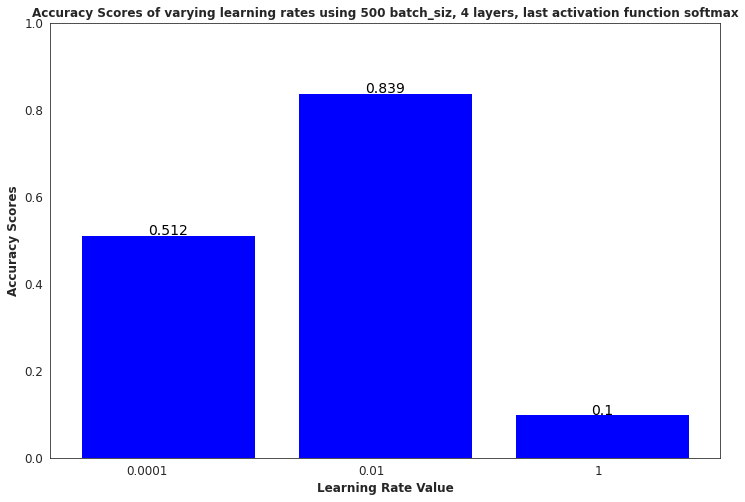

In [ ]:
#using bar graph to display the accuracy scores 


plt.figure(figsize=(12,8))
sns.set_style("white")

accuracy_scores=sm_accuracy_rounded

plt.bar(sm_lr4,accuracy_scores, color='blue')

#labeling each bar with their cv score value. 
for i in range(len(accuracy_scores)):
    plt.annotate(str(accuracy_scores[i]), xy=(sm_lr4[i],accuracy_scores[i]), ha='center', 
                 fontsize=14,fontweight='normal', color='black') #va='bottom')
    

    

plt.title("Accuracy Scores of varying learning rates using 500 batch_size, 4 layers, last activation function softmax", fontsize=12,weight='heavy')
plt.xlabel('Learning Rate Value', fontsize=12, weight='heavy')
plt.ylabel('Accuracy Scores', fontsize=12, weight='heavy')

plt.xticks(rotation=0, horizontalalignment='right', 
           weight='normal', fontsize=12)
plt.yticks(weight='normal', fontsize=12)

plt.ylim(top=1) #setting y-axis limit value 


plt.show()

<h1><font color="red">4. Compare your models' training scores and interpret your results.</h1></font color>


<h1><font color="red">5. Evaluate how your models perform on your test set. Compare the results of your models.</h1></font color>

## Using the activation functions reLu for the hidden layers and softmax as the last activation function had the best performing model using 0.01 learning rate, 500 batch_size, and 7 layers because this model had the highest test accuracy score of 0.849 and its training score having a close accuracy score. This model performed better than using learning rates 0.0001 or 1.

**0.01 learning rate with 7 layers**
* 1000 batch size had a 0.824 test accuracy score
* 500 batch size had a 0.849 test accuracy score

**0.01 learning rate with 4 layers**
* 1000 batch size had a 0.825 test accuracy score
* 500 batch size had a 0.839 test accuracy score

# Last Activation Function="Sigmoid"
# batch_size=1000
# 7 total layers 

In [ ]:
sigmoid_accuracy1=[]
sigmoid_lr1=[]

In [ ]:
#defining first ann model
ann_model=Sequential()


#first layer
ann_model.add(Dense(1024, input_shape=(784, ), activation="relu"))

#second layer
ann_model.add(Dense(512, activation="relu"))

#third layer
ann_model.add(Dense(256, activation="relu"))

#fourth layer
ann_model.add(Dense(128, activation="relu"))

#fifth layer
ann_model.add(Dense(64, activation="relu"))

#sixth layer
ann_model.add(Dense(32, activation="relu"))


#last layer; output layer.  
#using 10 because there are 10 labels total
ann_model.add(Dense(10, activation="sigmoid"))

In [ ]:
#displaying structure of the ANN model using summary()
ann_model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 1024)              803840    
_________________________________________________________________
dense_20 (Dense)             (None, 512)               524800    
_________________________________________________________________
dense_21 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_22 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_23 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_24 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_25 (Dense)             (None, 10)               

In [ ]:
#compiling the model
sgd_0001=optimizers.SGD(lr=0.0001) #lr=learning rate


ann_model.compile(optimizer=sgd_0001, 
                   loss="categorical_crossentropy",
                   metrics=["accuracy"])

#training the model
ann_model.fit(x_train, y_train, batch_size=1000, epochs=20, verbose=1)

Epoch 1/20
60/60 [==============================] - 8s 134ms/step - loss: 2.3045 - accuracy: 0.0997
Epoch 2/20
60/60 [==============================] - 8s 134ms/step - loss: 2.2981 - accuracy: 0.1049
Epoch 3/20
60/60 [==============================] - 8s 133ms/step - loss: 2.2939 - accuracy: 0.1058
Epoch 4/20
60/60 [==============================] - 8s 134ms/step - loss: 2.2893 - accuracy: 0.1069
Epoch 5/20
60/60 [==============================] - 8s 134ms/step - loss: 2.2853 - accuracy: 0.1077
Epoch 6/20
60/60 [==============================] - 8s 134ms/step - loss: 2.2816 - accuracy: 0.1059
Epoch 7/20
60/60 [==============================] - 8s 136ms/step - loss: 2.2765 - accuracy: 0.1090
Epoch 8/20
60/60 [==============================] - 8s 136ms/step - loss: 2.2724 - accuracy: 0.1100
Epoch 9/20
60/60 [==============================] - 8s 137ms/step - loss: 2.2685 - accuracy: 0.1114
Epoch 10/20
60/60 [==============================] - 8s 134ms/step - loss: 2.2638 - accuracy: 0.1161

In [ ]:
score=ann_model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy", score[1])

sig_0001=score[1]
sigmoid_accuracy1.append(sig_0001)
sigmoid_lr1.append("0.0001")

Test loss: 2.224557638168335
Test accuracy 0.14910000562667847


In [ ]:
sgd_01=optimizers.SGD(lr=0.01)

ann_model.compile(optimizer=sgd_01, 
                   loss="categorical_crossentropy",
                   metrics=["accuracy"])

#training the model
ann_model.fit(x_train, y_train, batch_size=1000, epochs=20, verbose=1)

Epoch 1/20
60/60 [==============================] - 12s 187ms/step - loss: 2.1356 - accuracy: 0.2113
Epoch 2/20
60/60 [==============================] - 12s 192ms/step - loss: 1.6861 - accuracy: 0.4974
Epoch 3/20
60/60 [==============================] - 11s 186ms/step - loss: 1.1454 - accuracy: 0.6503
Epoch 4/20
60/60 [==============================] - 11s 191ms/step - loss: 0.9373 - accuracy: 0.6717
Epoch 5/20
60/60 [==============================] - 11s 182ms/step - loss: 0.8432 - accuracy: 0.7023
Epoch 6/20
60/60 [==============================] - 11s 187ms/step - loss: 0.7652 - accuracy: 0.7393
Epoch 7/20
60/60 [==============================] - 10s 172ms/step - loss: 0.7091 - accuracy: 0.7586
Epoch 8/20
60/60 [==============================] - 11s 176ms/step - loss: 0.6801 - accuracy: 0.7674
Epoch 9/20
60/60 [==============================] - 11s 188ms/step - loss: 0.6500 - accuracy: 0.7808
Epoch 10/20
60/60 [==============================] - 12s 194ms/step - loss: 0.6238 - accura

In [ ]:
score=ann_model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy", score[1])

sig_01=score[1]
sigmoid_accuracy1.append(sig_01)
sigmoid_lr1.append("0.01")

Test loss: 0.509788453578949
Test accuracy 0.8184999823570251


In [ ]:
sgd_1=optimizers.SGD(lr=1)

ann_model.compile(optimizer=sgd_1, 
                   loss="categorical_crossentropy",
                   metrics=["accuracy"])

#training the model
ann_model.fit(x_train, y_train, batch_size=1000, epochs=20, verbose=1)

Epoch 1/20
60/60 [==============================] - 9s 136ms/step - loss: nan - accuracy: 0.1587
Epoch 2/20
60/60 [==============================] - 8s 137ms/step - loss: nan - accuracy: 0.0988
Epoch 3/20
60/60 [==============================] - 8s 137ms/step - loss: nan - accuracy: 0.1002
Epoch 4/20
60/60 [==============================] - 8s 139ms/step - loss: nan - accuracy: 0.1003
Epoch 5/20
60/60 [==============================] - 9s 142ms/step - loss: nan - accuracy: 0.1003
Epoch 6/20
60/60 [==============================] - 8s 136ms/step - loss: nan - accuracy: 0.1006
Epoch 7/20
60/60 [==============================] - 8s 137ms/step - loss: nan - accuracy: 0.1023
Epoch 8/20
60/60 [==============================] - 8s 140ms/step - loss: nan - accuracy: 0.0995
Epoch 9/20
60/60 [==============================] - 8s 137ms/step - loss: nan - accuracy: 0.1004
Epoch 10/20
60/60 [==============================] - 8s 135ms/step - loss: nan - accuracy: 0.0983
Epoch 11/20
60/60 [==========

In [ ]:
score=ann_model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy", score[1])

sig_1=score[1]
sigmoid_accuracy1.append(sig_1)
sigmoid_lr1.append("1")

Test loss: nan
Test accuracy 0.10000000149011612


In [ ]:
#for eligibility, rounding silhouette scores to 3 decimal places
sm_accuracy_rounded = [round(x,3) for x in sigmoid_accuracy1] 
sm_accuracy_rounded

[0.149, 0.818, 0.1]

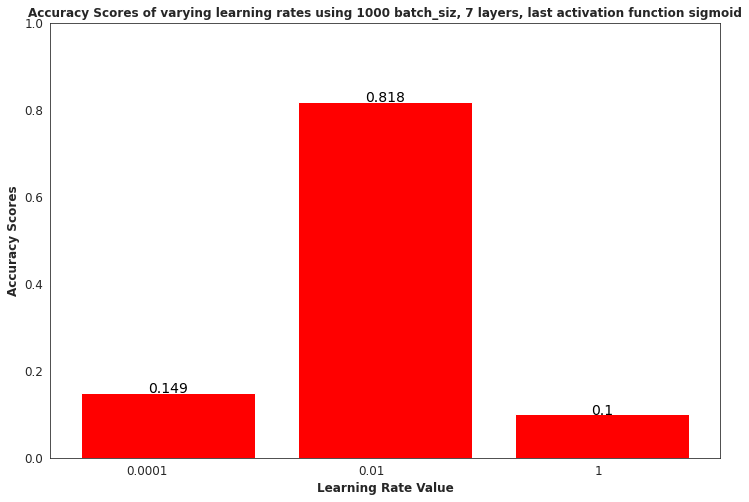

In [ ]:
#using bar graph to display the accuracy scores 


plt.figure(figsize=(12,8))
sns.set_style("white")

accuracy_scores=sm_accuracy_rounded

plt.bar(sigmoid_lr1,accuracy_scores, color='red')

#labeling each bar with their cv score value. 
for i in range(len(accuracy_scores)):
    plt.annotate(str(accuracy_scores[i]), xy=(sigmoid_lr1[i],accuracy_scores[i]), ha='center', 
                 fontsize=14,fontweight='normal', color='black') #va='bottom')
    

    

plt.title("Accuracy Scores of varying learning rates using 1000 batch_size, 7 layers, last activation function sigmoid", fontsize=12,weight='heavy')
plt.xlabel('Learning Rate Value', fontsize=12, weight='heavy')
plt.ylabel('Accuracy Scores', fontsize=12, weight='heavy')

plt.xticks(rotation=0, horizontalalignment='right', 
           weight='normal', fontsize=12)
plt.yticks(weight='normal', fontsize=12)

plt.ylim(top=1) #setting y-axis limit value 


plt.show()

# Last Activation Function="Sigmoid"
# batch_size=500
# 7 total layers 

In [ ]:
sigmoid_accuracy2=[]
sigmoid_lr2=[]

In [ ]:
#defining first ann model
ann_model=Sequential()


#first layer
ann_model.add(Dense(1024, input_shape=(784, ), activation="relu"))

#second layer
ann_model.add(Dense(512, activation="relu"))

#third layer
ann_model.add(Dense(256, activation="relu"))

#fourth layer
ann_model.add(Dense(128, activation="relu"))

#fifth layer
ann_model.add(Dense(64, activation="relu"))

#sixth layer
ann_model.add(Dense(32, activation="relu"))


#last layer; output layer.  
#using 10 because there are 10 labels total
ann_model.add(Dense(10, activation="sigmoid"))

In [ ]:
#compiling the model
sgd_0001=optimizers.SGD(lr=0.0001) #lr=learning rate


ann_model.compile(optimizer=sgd_0001, 
                   loss="categorical_crossentropy",
                   metrics=["accuracy"])

#training the model
ann_model.fit(x_train, y_train, batch_size=500, epochs=20, verbose=1)

Epoch 1/20
120/120 [==============================] - 9s 74ms/step - loss: 2.3022 - accuracy: 0.1269
Epoch 2/20
120/120 [==============================] - 9s 73ms/step - loss: 2.2969 - accuracy: 0.1304
Epoch 3/20
120/120 [==============================] - 9s 73ms/step - loss: 2.2914 - accuracy: 0.1320
Epoch 4/20
120/120 [==============================] - 9s 73ms/step - loss: 2.2868 - accuracy: 0.1331
Epoch 5/20
120/120 [==============================] - 9s 74ms/step - loss: 2.2820 - accuracy: 0.1363
Epoch 6/20
120/120 [==============================] - 9s 73ms/step - loss: 2.2786 - accuracy: 0.1361
Epoch 7/20
120/120 [==============================] - 9s 75ms/step - loss: 2.2751 - accuracy: 0.1337
Epoch 8/20
120/120 [==============================] - 9s 76ms/step - loss: 2.2710 - accuracy: 0.1366
Epoch 9/20
120/120 [==============================] - 9s 74ms/step - loss: 2.2675 - accuracy: 0.1404
Epoch 10/20
120/120 [==============================] - 9s 75ms/step - loss: 2.2646 - accura

In [ ]:
score=ann_model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy", score[1])


sig_0001=score[1]
sigmoid_accuracy2.append(sig_0001)
sigmoid_lr2.append("0.0001")


Test loss: 2.228036642074585
Test accuracy 0.19020000100135803


In [ ]:
#compiling the model
sgd_01=optimizers.SGD(lr=0.01) #lr=learning rate


ann_model.compile(optimizer=sgd_01, 
                   loss="categorical_crossentropy",
                   metrics=["accuracy"])

#training the model
ann_model.fit(x_train, y_train, batch_size=500, epochs=20, verbose=1)

Epoch 1/20
120/120 [==============================] - 9s 73ms/step - loss: 2.1234 - accuracy: 0.2525
Epoch 2/20
120/120 [==============================] - 9s 73ms/step - loss: 1.4434 - accuracy: 0.6475
Epoch 3/20
120/120 [==============================] - 9s 74ms/step - loss: 0.8573 - accuracy: 0.7165
Epoch 4/20
120/120 [==============================] - 9s 73ms/step - loss: 0.7252 - accuracy: 0.7470
Epoch 5/20
120/120 [==============================] - 9s 73ms/step - loss: 0.6485 - accuracy: 0.7767
Epoch 6/20
120/120 [==============================] - 9s 72ms/step - loss: 0.5890 - accuracy: 0.7993
Epoch 7/20
120/120 [==============================] - 9s 73ms/step - loss: 0.5594 - accuracy: 0.8033
Epoch 8/20
120/120 [==============================] - 9s 73ms/step - loss: 0.5312 - accuracy: 0.8150
Epoch 9/20
120/120 [==============================] - 9s 73ms/step - loss: 0.5051 - accuracy: 0.8264
Epoch 10/20
120/120 [==============================] - 9s 73ms/step - loss: 0.4881 - accura

In [ ]:
score=ann_model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy", score[1])

sig_01=score[1]
sigmoid_accuracy2.append(sig_01)
sigmoid_lr2.append("0.01")

Test loss: 0.45206737518310547
Test accuracy 0.8413000106811523


In [ ]:
#compiling the model
sgd_1=optimizers.SGD(lr=1) #lr=learning rate


ann_model.compile(optimizer=sgd_1, 
                   loss="categorical_crossentropy",
                   metrics=["accuracy"])

#training the model
ann_model.fit(x_train, y_train, batch_size=500, epochs=20, verbose=1)

Epoch 1/20
120/120 [==============================] - 9s 73ms/step - loss: nan - accuracy: 0.1330
Epoch 2/20
120/120 [==============================] - 9s 74ms/step - loss: nan - accuracy: 0.0993
Epoch 3/20
120/120 [==============================] - 9s 75ms/step - loss: nan - accuracy: 0.1010
Epoch 4/20
120/120 [==============================] - 9s 74ms/step - loss: nan - accuracy: 0.1003
Epoch 5/20
120/120 [==============================] - 9s 79ms/step - loss: nan - accuracy: 0.1005
Epoch 6/20
120/120 [==============================] - 9s 74ms/step - loss: nan - accuracy: 0.1015
Epoch 7/20
120/120 [==============================] - 9s 74ms/step - loss: nan - accuracy: 0.1014
Epoch 8/20
120/120 [==============================] - 9s 73ms/step - loss: nan - accuracy: 0.1011
Epoch 9/20
120/120 [==============================] - 9s 73ms/step - loss: nan - accuracy: 0.0991
Epoch 10/20
120/120 [==============================] - 9s 73ms/step - loss: nan - accuracy: 0.0988
Epoch 11/20
120/120

In [ ]:
score=ann_model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy", score[1])

sig_1=score[1]
sigmoid_accuracy2.append(sig_1)
sigmoid_lr2.append("1")

Test loss: nan
Test accuracy 0.10000000149011612


In [ ]:
#for eligibility, rounding silhouette scores to 3 decimal places
sm_accuracy_rounded = [round(x,3) for x in sigmoid_accuracy2] 
sm_accuracy_rounded

[0.19, 0.841, 0.1]

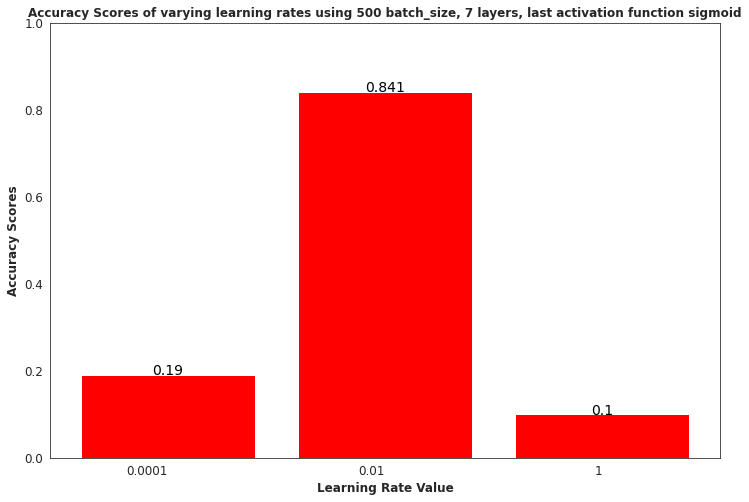

In [ ]:
#using bar graph to display the accuracy scores 


plt.figure(figsize=(12,8))
sns.set_style("white")

accuracy_scores=sm_accuracy_rounded

plt.bar(sigmoid_lr2,accuracy_scores, color='red')

#labeling each bar with their cv score value. 
for i in range(len(accuracy_scores)):
    plt.annotate(str(accuracy_scores[i]), xy=(sigmoid_lr2[i],accuracy_scores[i]), ha='center', 
                 fontsize=14,fontweight='normal', color='black') #va='bottom')
    

    

plt.title("Accuracy Scores of varying learning rates using 500 batch_size, 7 layers, last activation function sigmoid", fontsize=12,weight='heavy')
plt.xlabel('Learning Rate Value', fontsize=12, weight='heavy')
plt.ylabel('Accuracy Scores', fontsize=12, weight='heavy')

plt.xticks(rotation=0, horizontalalignment='right', 
           weight='normal', fontsize=12)
plt.yticks(weight='normal', fontsize=12)

plt.ylim(top=1) #setting y-axis limit value 


plt.show()

# Last Activation Function="Sigmoid"
# batch_size=1000
# 4 total layers 

In [ ]:
sigmoid_accuracy3=[]
sigmoid_lr3=[]

In [ ]:
#defining ann model
ann_model=Sequential()


#first layer
ann_model.add(Dense(1024, input_shape=(784, ), activation="relu"))

#second layer
ann_model.add(Dense(512, activation="relu"))

#third layer
ann_model.add(Dense(64, activation="relu"))

#last layer; output layer.  
#using 10 because there are 10 labels total
ann_model.add(Dense(10, activation="sigmoid"))

In [ ]:
#compiling the model
sgd_0001=optimizers.SGD(lr=0.0001) #lr=learning rate


ann_model.compile(optimizer=sgd_0001, 
                   loss="categorical_crossentropy",
                   metrics=["accuracy"])

#training the model
ann_model.fit(x_train, y_train, batch_size=1000, epochs=20, verbose=1)

Epoch 1/20
60/60 [==============================] - 8s 120ms/step - loss: 2.3216 - accuracy: 0.1231
Epoch 2/20
60/60 [==============================] - 7s 120ms/step - loss: 2.2999 - accuracy: 0.1424
Epoch 3/20
60/60 [==============================] - 7s 120ms/step - loss: 2.2776 - accuracy: 0.1588
Epoch 4/20
60/60 [==============================] - 7s 120ms/step - loss: 2.2585 - accuracy: 0.1843
Epoch 5/20
60/60 [==============================] - 7s 120ms/step - loss: 2.2413 - accuracy: 0.2051
Epoch 6/20
60/60 [==============================] - 8s 129ms/step - loss: 2.2224 - accuracy: 0.2286
Epoch 7/20
60/60 [==============================] - 7s 123ms/step - loss: 2.2055 - accuracy: 0.2474
Epoch 8/20
60/60 [==============================] - 7s 119ms/step - loss: 2.1904 - accuracy: 0.2677
Epoch 9/20
60/60 [==============================] - 7s 120ms/step - loss: 2.1760 - accuracy: 0.2897
Epoch 10/20
60/60 [==============================] - 7s 120ms/step - loss: 2.1608 - accuracy: 0.3084

In [ ]:
score=ann_model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy", score[1])

sig_0001=score[1]
sigmoid_accuracy3.append(sig_0001)
sigmoid_lr3.append("0.0001")

Test loss: 2.0301222801208496
Test accuracy 0.48980000615119934


In [ ]:
#compiling the model
sgd_01=optimizers.SGD(lr=0.01) #lr=learning rate


ann_model.compile(optimizer=sgd_01, 
                   loss="categorical_crossentropy",
                   metrics=["accuracy"])

#training the model
ann_model.fit(x_train, y_train, batch_size=1000, epochs=20, verbose=1)

Epoch 1/20
60/60 [==============================] - 8s 121ms/step - loss: 1.8113 - accuracy: 0.5798
Epoch 2/20
60/60 [==============================] - 7s 119ms/step - loss: 1.2010 - accuracy: 0.6949
Epoch 3/20
60/60 [==============================] - 7s 119ms/step - loss: 0.9328 - accuracy: 0.7359
Epoch 4/20
60/60 [==============================] - 7s 120ms/step - loss: 0.8019 - accuracy: 0.7604
Epoch 5/20
60/60 [==============================] - 7s 119ms/step - loss: 0.7340 - accuracy: 0.7777
Epoch 6/20
60/60 [==============================] - 7s 118ms/step - loss: 0.6747 - accuracy: 0.7903
Epoch 7/20
60/60 [==============================] - 7s 119ms/step - loss: 0.6417 - accuracy: 0.7979
Epoch 8/20
60/60 [==============================] - 7s 120ms/step - loss: 0.6114 - accuracy: 0.8056
Epoch 9/20
60/60 [==============================] - 7s 120ms/step - loss: 0.5922 - accuracy: 0.8108
Epoch 10/20
60/60 [==============================] - 7s 120ms/step - loss: 0.5792 - accuracy: 0.8131

In [ ]:
score=ann_model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy", score[1])

sig_01=score[1]
sigmoid_accuracy3.append(sig_01)
sigmoid_lr3.append("0.01")

Test loss: 0.5105912089347839
Test accuracy 0.8227999806404114


In [ ]:
#compiling the model
sgd_1=optimizers.SGD(lr=1) #lr=learning rate


ann_model.compile(optimizer=sgd_1, 
                   loss="categorical_crossentropy",
                   metrics=["accuracy"])

#training the model
ann_model.fit(x_train, y_train, batch_size=1000, epochs=20, verbose=1)

Epoch 1/20
60/60 [==============================] - 7s 119ms/step - loss: nan - accuracy: 0.1002
Epoch 2/20
60/60 [==============================] - 7s 120ms/step - loss: nan - accuracy: 0.1012
Epoch 3/20
60/60 [==============================] - 7s 120ms/step - loss: nan - accuracy: 0.1006
Epoch 4/20
60/60 [==============================] - 7s 119ms/step - loss: nan - accuracy: 0.1016
Epoch 5/20
60/60 [==============================] - 7s 120ms/step - loss: nan - accuracy: 0.1009
Epoch 6/20
60/60 [==============================] - 7s 119ms/step - loss: nan - accuracy: 0.0997
Epoch 7/20
60/60 [==============================] - 7s 120ms/step - loss: nan - accuracy: 0.1009
Epoch 8/20
60/60 [==============================] - 7s 119ms/step - loss: nan - accuracy: 0.1004
Epoch 9/20
60/60 [==============================] - 7s 120ms/step - loss: nan - accuracy: 0.0994
Epoch 10/20
60/60 [==============================] - 7s 120ms/step - loss: nan - accuracy: 0.1007
Epoch 11/20
60/60 [==========

In [ ]:
score=ann_model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy", score[1])

sig_1=score[1]
sigmoid_accuracy3.append(sig_1)
sigmoid_lr3.append("1")

Test loss: nan
Test accuracy 0.10000000149011612


In [ ]:
#for eligibility, rounding silhouette scores to 3 decimal places
sm_accuracy_rounded = [round(x,3) for x in sigmoid_accuracy3] 
sm_accuracy_rounded

[0.49, 0.823, 0.1]

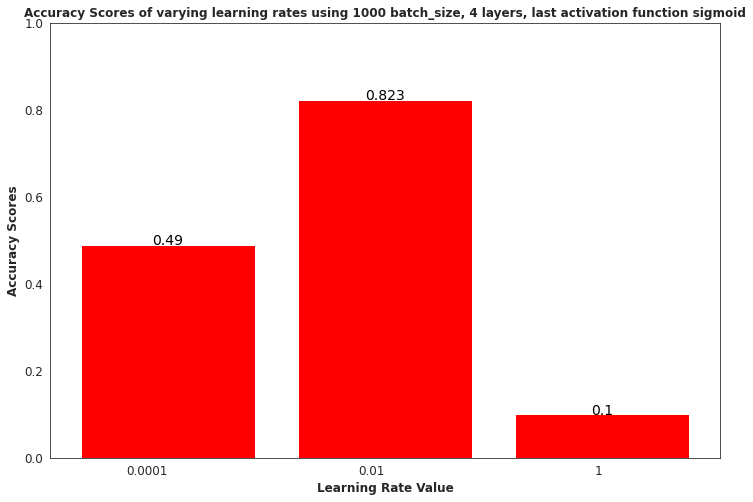

In [ ]:
#using bar graph to display the accuracy scores 


plt.figure(figsize=(12,8))
sns.set_style("white")

accuracy_scores=sm_accuracy_rounded

plt.bar(sigmoid_lr3,accuracy_scores, color='red')

#labeling each bar with their cv score value. 
for i in range(len(accuracy_scores)):
    plt.annotate(str(accuracy_scores[i]), xy=(sigmoid_lr3[i],accuracy_scores[i]), ha='center', 
                 fontsize=14,fontweight='normal', color='black') #va='bottom')
    

    

plt.title("Accuracy Scores of varying learning rates using 1000 batch_size, 4 layers, last activation function sigmoid", fontsize=12,weight='heavy')
plt.xlabel('Learning Rate Value', fontsize=12, weight='heavy')
plt.ylabel('Accuracy Scores', fontsize=12, weight='heavy')

plt.xticks(rotation=0, horizontalalignment='right', 
           weight='normal', fontsize=12)
plt.yticks(weight='normal', fontsize=12)

plt.ylim(top=1) #setting y-axis limit value 


plt.show()

# Last Activation Function="Sigmoid"
# batch_size=500
# 4 total layers 

In [ ]:
sigmoid_accuracy4=[]
sigmoid_lr4=[]

In [ ]:
#defining ann model
ann_model=Sequential()


#first layer
ann_model.add(Dense(1024, input_shape=(784, ), activation="relu"))

#second layer
ann_model.add(Dense(512, activation="relu"))

#third layer
ann_model.add(Dense(64, activation="relu"))

#last layer; output layer.  
#using 10 because there are 10 labels total
ann_model.add(Dense(10, activation="sigmoid"))

In [ ]:
#compiling the model
sgd_0001=optimizers.SGD(lr=0.0001) #lr=learning rate


ann_model.compile(optimizer=sgd_0001, 
                   loss="categorical_crossentropy",
                   metrics=["accuracy"])

#training the model
ann_model.fit(x_train, y_train, batch_size=500, epochs=20, verbose=1)

Epoch 1/20
120/120 [==============================] - 8s 64ms/step - loss: 2.3365 - accuracy: 0.1103
Epoch 2/20
120/120 [==============================] - 8s 65ms/step - loss: 2.3120 - accuracy: 0.1283
Epoch 3/20
120/120 [==============================] - 8s 64ms/step - loss: 2.2889 - accuracy: 0.1560
Epoch 4/20
120/120 [==============================] - 8s 65ms/step - loss: 2.2666 - accuracy: 0.1875
Epoch 5/20
120/120 [==============================] - 8s 64ms/step - loss: 2.2434 - accuracy: 0.2261
Epoch 6/20
120/120 [==============================] - 8s 64ms/step - loss: 2.2192 - accuracy: 0.2790
Epoch 7/20
120/120 [==============================] - 8s 65ms/step - loss: 2.1971 - accuracy: 0.3217
Epoch 8/20
120/120 [==============================] - 8s 64ms/step - loss: 2.1731 - accuracy: 0.3563
Epoch 9/20
120/120 [==============================] - 8s 65ms/step - loss: 2.1522 - accuracy: 0.3720
Epoch 10/20
120/120 [==============================] - 8s 65ms/step - loss: 2.1287 - accura

In [ ]:
score=ann_model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy", score[1])

sig_0001=score[1]
sigmoid_accuracy4.append(sig_0001)
sigmoid_lr4.append("0.0001")

Test loss: 1.923804521560669
Test accuracy 0.4611000120639801


In [ ]:
#compiling the model
sgd_01=optimizers.SGD(lr=0.01) #lr=learning rate


ann_model.compile(optimizer=sgd_01, 
                   loss="categorical_crossentropy",
                   metrics=["accuracy"])

#training the model
ann_model.fit(x_train, y_train, batch_size=500, epochs=20, verbose=1)

Epoch 1/20
120/120 [==============================] - 8s 64ms/step - loss: 1.5722 - accuracy: 0.5668
Epoch 2/20
120/120 [==============================] - 8s 65ms/step - loss: 0.9207 - accuracy: 0.7035
Epoch 3/20
120/120 [==============================] - 8s 64ms/step - loss: 0.7412 - accuracy: 0.7584
Epoch 4/20
120/120 [==============================] - 8s 64ms/step - loss: 0.6649 - accuracy: 0.7819
Epoch 5/20
120/120 [==============================] - 8s 64ms/step - loss: 0.6147 - accuracy: 0.7967
Epoch 6/20
120/120 [==============================] - 8s 65ms/step - loss: 0.5754 - accuracy: 0.8095
Epoch 7/20
120/120 [==============================] - 8s 64ms/step - loss: 0.5517 - accuracy: 0.8151
Epoch 8/20
120/120 [==============================] - 8s 64ms/step - loss: 0.5284 - accuracy: 0.8235
Epoch 9/20
120/120 [==============================] - 8s 64ms/step - loss: 0.5072 - accuracy: 0.8288
Epoch 10/20
120/120 [==============================] - 8s 64ms/step - loss: 0.5022 - accura

In [ ]:
score=ann_model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy", score[1])

sig_01=score[1]
sigmoid_accuracy4.append(sig_01)
sigmoid_lr4.append("0.01")

Test loss: 0.4589643180370331
Test accuracy 0.8393999934196472


In [ ]:
#compiling the model
sgd_1=optimizers.SGD(lr=1) #lr=learning rate


ann_model.compile(optimizer=sgd_1, 
                   loss="categorical_crossentropy",
                   metrics=["accuracy"])

#training the model
ann_model.fit(x_train, y_train, batch_size=500, epochs=20, verbose=1)

Epoch 1/20
120/120 [==============================] - 8s 65ms/step - loss: nan - accuracy: 0.1417
Epoch 2/20
120/120 [==============================] - 8s 66ms/step - loss: nan - accuracy: 0.0982
Epoch 3/20
120/120 [==============================] - 8s 65ms/step - loss: nan - accuracy: 0.1001
Epoch 4/20
120/120 [==============================] - 8s 64ms/step - loss: nan - accuracy: 0.1009
Epoch 5/20
120/120 [==============================] - 8s 64ms/step - loss: nan - accuracy: 0.0983
Epoch 6/20
120/120 [==============================] - 8s 65ms/step - loss: nan - accuracy: 0.0989
Epoch 7/20
120/120 [==============================] - 8s 64ms/step - loss: nan - accuracy: 0.0994
Epoch 8/20
120/120 [==============================] - 8s 65ms/step - loss: nan - accuracy: 0.0999
Epoch 9/20
120/120 [==============================] - 8s 65ms/step - loss: nan - accuracy: 0.0992
Epoch 10/20
120/120 [==============================] - 8s 66ms/step - loss: nan - accuracy: 0.1022
Epoch 11/20
120/120

In [ ]:
score=ann_model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy", score[1])

sig_1=score[1]
sigmoid_accuracy4.append(sig_1)
sigmoid_lr4.append("1")

Test loss: nan
Test accuracy 0.10000000149011612


In [ ]:
#for eligibility, rounding silhouette scores to 3 decimal places
sm_accuracy_rounded = [round(x,3) for x in sigmoid_accuracy4] 
sm_accuracy_rounded

[0.461, 0.839, 0.1]

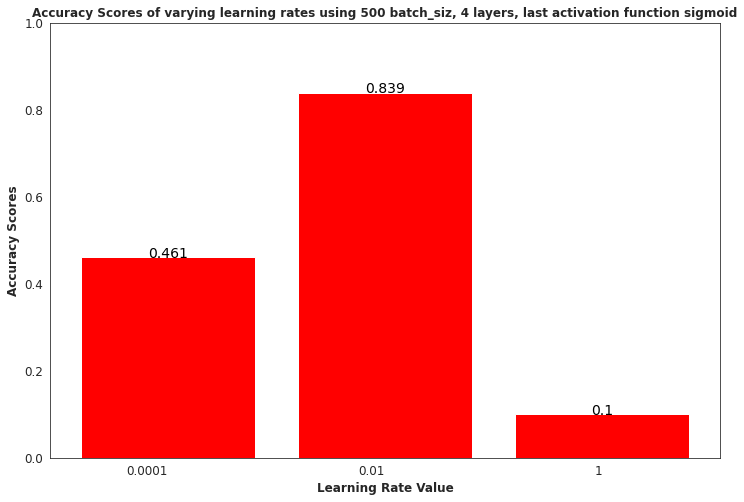

In [ ]:
#using bar graph to display the accuracy scores 


plt.figure(figsize=(12,8))
sns.set_style("white")

accuracy_scores=sm_accuracy_rounded

plt.bar(sigmoid_lr4,accuracy_scores, color='red')

#labeling each bar with their cv score value. 
for i in range(len(accuracy_scores)):
    plt.annotate(str(accuracy_scores[i]), xy=(sigmoid_lr4[i],accuracy_scores[i]), ha='center', 
                 fontsize=14,fontweight='normal', color='black') #va='bottom')
    

    

plt.title("Accuracy Scores of varying learning rates using 500 batch_siz, 4 layers, last activation function sigmoid", fontsize=12,weight='heavy')
plt.xlabel('Learning Rate Value', fontsize=12, weight='heavy')
plt.ylabel('Accuracy Scores', fontsize=12, weight='heavy')

plt.xticks(rotation=0, horizontalalignment='right', 
           weight='normal', fontsize=12)
plt.yticks(weight='normal', fontsize=12)

plt.ylim(top=1) #setting y-axis limit value 


plt.show()

<h1><font color="red">4. Compare your models' training scores and interpret your results.</h1></font color>


<h1><font color="red">5. Evaluate how your models perform on your test set. Compare the results of your models.</h1></font color>


## Using the activation functions reLu for the hidden layers and sigmoid as the last activation function had the best performing model using 0.01 learning rate, 500 batch_size, and 7 layers because this model had the highest test accuracy score of 0.841 and its training score having a close accuracy score. This model performed better than using learning rates 0.0001 or 1.

**0.01 learning rate with 7 layers**
* 1000 batch size had a 0.818 test accuracy score
* 500 batch size had a 0.841 test accuracy score

**0.01 learning rate with 4 layers**
* 1000 batch size had a 0.823 test accuracy score
* 500 batch size had a 0.839 test accuracy score